<a href="https://colab.research.google.com/github/lazybuttrying/AI_Project/blob/main/leaf_segmentation/MaskRCNN/result/output_count%26area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!pip install tensorboard==1.15.0 tensorflow==1.15.0 tensorflow-estimator==1.15.1 tensorflow-gpu==1.15.2 tensorflow-gpu-estimator==2.1.0 Keras==2.2.5 Keras-Applications==1.0.8 Keras-Preprocessing==1.1.0
!pip uninstall h5py -y
!pip install h5py==2.10.0  
!pip install -U scikit-image==0.16.2

     |████████████████████████████████| 3.8 MB 5.0 MB/s 
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 503 kB 54.4 MB/s 
     |████████████████████████████████| 410.9 MB 35 kB/s 
     |████████████████████████████████| 464 kB 61.3 MB/s 
     |████████████████████████████████| 336 kB 59.9 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 41 kB 580 kB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=b0c332a7c8eca713dfbd73b5d2ef63b690f233716bd0b15236881a697d3533f0
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing in

In [3]:
cd /gdrive/My Drive/AI/maskrcnn/Mask_RCNN/

/gdrive/My Drive/AI/maskrcnn/Mask_RCNN


In [4]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt

# Mask R-CNN - Inspect Ballon Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [5]:
# Root directory of the project
import os
ROOT_DIR = os.path.abspath("./")
ROOT_DIR

'/gdrive/My Drive/AI/maskrcnn/Mask_RCNN'

In [6]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
sys.path.append(ROOT_DIR + '/samples/leaf/')
import leaf

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
# LEAF_WEIGHTS_PATH = "/path/to/mask_rcnn_leaf.h5"  # TODO: update this path

Using TensorFlow backend.


## Configurations

In [7]:
LEAF_DIR = ROOT_DIR + "/leaf_dataset"
LEAF_DIR

'/gdrive/My Drive/AI/maskrcnn/Mask_RCNN/leaf_dataset'

In [8]:
# # Override the training configurations with a few
# # changes for inferencing.
# class InferenceConfig(config.__class__):
#     # Run detection on one image at a time
#     GPU_COUNT = 1
#     IMAGES_PER_GPU = 1

# config = InferenceConfig()

config = leaf.LeafConfig()
config.IMAGES_PER_GPU = 1
config.GPU_COUNT = 1
config.BATCH_SIZE = 1 
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Notebook Preferences

In [12]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
# DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0
DEVICE = "/cpu:0"

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [13]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [14]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [15]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
#weights_path = model.find_last()

# Load weights
#print("Loading weights ", weights_path)
weight_path = '/gdrive/MyDrive/AI/maskrcnn/Mask_RCNN/logs/fit/20220122-015036/leaf20220122T0215/mask_rcnn_leaf_0023.h5'
model.load_weights(weight_path, by_name=True)







Re-starting from epoch 23


## Load Validation Dataset

In [ ]:
class LeafDataset(utils.Dataset):

    def load_leaf(self, dataset_dir, subset):
        """Load a subset of the Balloon dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """

        print(dataset_dir, subset)
        # Add classes. We have only one class to add.
        self.add_class("leaf", 1, "leaf")
        
        # Train or validation dataset?
        assert subset in ["train", "val", "test"]
        dataset_dir = os.path.join(dataset_dir, subset)

        if subset == "test":
          for idx, fname in enumerate(os.listdir(dataset_dir)):
            image_path = os.path.join(dataset_dir, fname)
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
              "leaf", 
              image_id=fname,
                path=image_path,
                width=width, height=height, polygons=[])
          return


In [55]:
# Load validation dataset
dataset = leaf.LeafDataset()
dataset.load_leaf(LEAF_DIR, "test")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

/gdrive/My Drive/AI/maskrcnn/Mask_RCNN/leaf_dataset test
Images: 5
Classes: ['BG', 'leaf']


In [10]:
dataset.image_ids

array([0, 1, 2, 3, 4])

## Run Detection

image ID: leaf.plant037~A2_rgb.png의 사본 (0) /gdrive/My Drive/AI/maskrcnn/Mask_RCNN/leaf_dataset/test/plant037~A2_rgb.png의 사본
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  191.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   68.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: ()                    min:    1.00000  max:    1.00000  int64
gt_bbox                  shape: (17, 4)               min:  155.00000  max:  889.00000  int32
gt_mask                  shape: (1024, 1024, 17)      min:    0.00000  max:    1.00000  bool


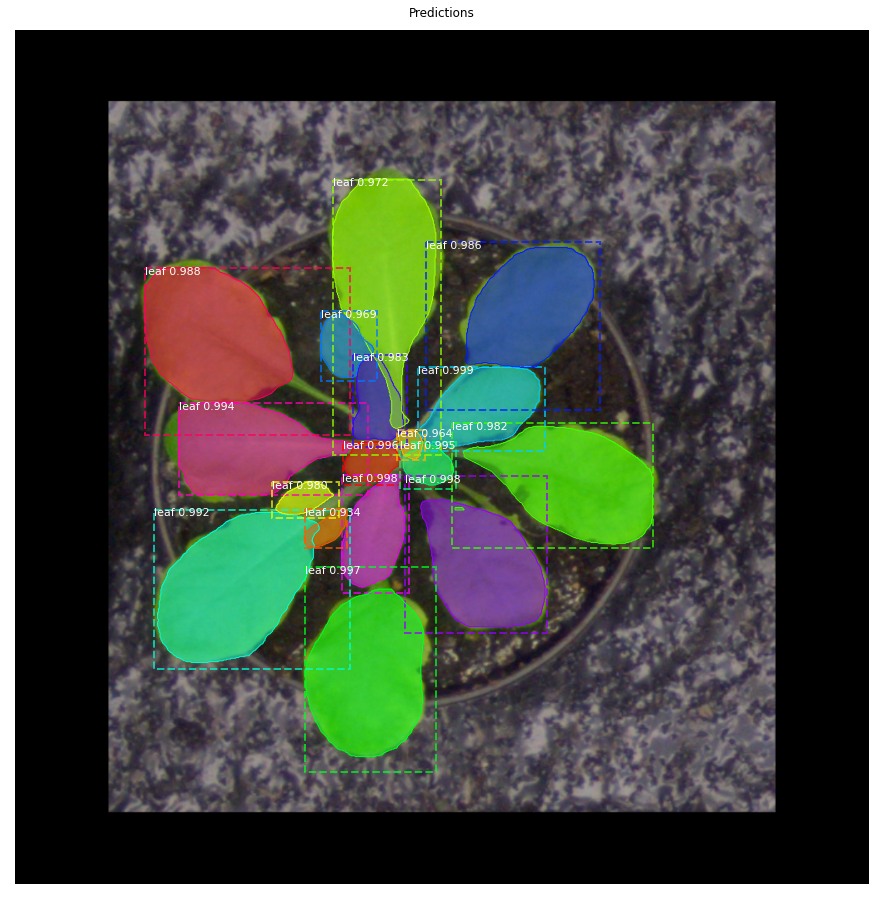

In [56]:
image_id = random.choice(dataset.image_ids)
image, image_meta, n, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                      dataset.image_reference(image_id)))


# Run object detection
results = model.detect([image], verbose=1)


# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

gt_class_id = np.array(1) # leaf 하나
gt_bbox = r['rois']
gt_mask = r['masks']
# annotation 파일 내용. 없으면 min max 값이 없음
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [57]:
r.keys()

dict_keys(['rois', 'class_ids', 'scores', 'masks'])

In [58]:
r['class_ids'] # [instance_count] Integer class IDs

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [59]:
r['rois'] #  [instance_count, (y1, x1, y2, x2)]

array([[403, 483, 504, 635],
       [534, 467, 722, 638],
       [533, 392, 674, 472],
       [643, 348, 889, 505],
       [493, 393, 544, 462],
       [493, 462, 549, 529],
       [446, 196, 556, 423],
       [574, 166, 765, 402],
       [284, 155, 485, 401],
       [253, 493, 454, 702],
       [388, 405, 499, 470],
       [470, 524, 620, 765],
       [541, 308, 584, 388],
       [178, 381, 509, 511],
       [336, 367, 420, 434],
       [479, 458, 514, 491],
       [573, 347, 620, 398]], dtype=int32)

In [60]:
r['scores']

array([0.9986174 , 0.9979936 , 0.99769515, 0.99742055, 0.9960156 ,
       0.9954341 , 0.99415743, 0.9919803 , 0.98829985, 0.98648816,
       0.9832893 , 0.9819049 , 0.98017853, 0.97208947, 0.9685892 ,
       0.9640444 , 0.934112  ], dtype=float32)

## Color Splash

This is for illustration. You can call `leaf.py` with the `splash` option to get better images without the black padding.

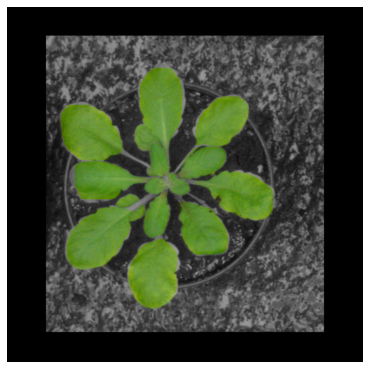

In [61]:
splash = leaf.color_splash(image, r['masks'])
display_images([splash], cols=2)

## Step by Step Prediction

## Stage 1: Region Proposal Network

The Region Proposal Network (RPN) runs a lightweight binary classifier on a lot of boxes (anchors) over the image and returns object/no-object scores. Anchors with high *objectness* score (positive anchors) are passed to the stage two to be classified.

Often, even positive anchors don't cover objects fully. So the RPN also regresses a refinement (a delta in location and size) to be applied to the anchors to shift it and resize it a bit to the correct boundaries of the object.

### 1.a RPN Targets

The RPN targets are the training values for the RPN. To generate the targets, we start with a grid of anchors that cover the full image at different scales, and then we compute the IoU of the anchors with ground truth object. Positive anchors are those that have an IoU >= 0.7 with any ground truth object, and negative anchors are those that don't cover any object by more than 0.3 IoU. Anchors in between (i.e. cover an object by IoU >= 0.3 but < 0.7) are considered neutral and excluded from training.

To train the RPN regressor, we also compute the shift and resizing needed to make the anchor cover the ground truth object completely.

In [62]:
# Generate RPN trainig targets
# target_rpn_match is 1 for positive anchors, -1 for negative anchors
# and 0 for neutral anchors.

target_rpn_match, target_rpn_bbox = modellib.build_rpn_targets(
    image.shape, model.anchors, gt_class_id, gt_bbox, model.config)
log("target_rpn_match", target_rpn_match)
log("target_rpn_bbox", target_rpn_bbox)

positive_anchor_ix = np.where(target_rpn_match[:] == 1)[0]
negative_anchor_ix = np.where(target_rpn_match[:] == -1)[0]
neutral_anchor_ix = np.where(target_rpn_match[:] == 0)[0]
positive_anchors = model.anchors[positive_anchor_ix]
negative_anchors = model.anchors[negative_anchor_ix]
neutral_anchors = model.anchors[neutral_anchor_ix]
log("positive_anchors", positive_anchors)
log("negative_anchors", negative_anchors)
log("neutral anchors", neutral_anchors)

# Apply refinement deltas to positive anchors
refined_anchors = utils.apply_box_deltas(
    positive_anchors,
    target_rpn_bbox[:positive_anchors.shape[0]] * model.config.RPN_BBOX_STD_DEV)
log("refined_anchors", refined_anchors, )


target_rpn_match         shape: (261888,)             min:   -1.00000  max:    1.00000  int32
target_rpn_bbox          shape: (256, 4)              min:   -2.67271  max:    1.92206  float64
positive_anchors         shape: (54, 4)               min:  160.00000  max:  981.01934  float64
negative_anchors         shape: (202, 4)              min:  -48.00000  max: 1141.01934  float64
neutral anchors          shape: (261632, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (54, 4)               min:  155.00000  max:  889.00000  float32


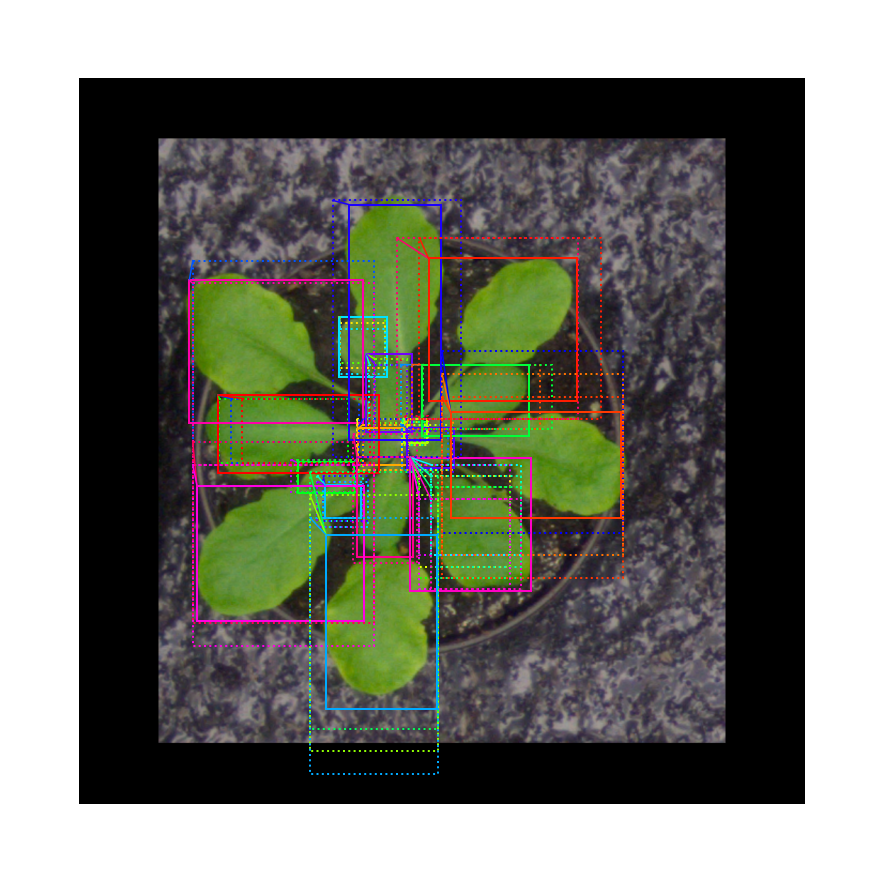

In [63]:
# Display positive anchors before refinement (dotted) and
# after refinement (solid).
visualize.draw_boxes(image, boxes=positive_anchors, refined_boxes=refined_anchors, ax=get_ax())

### 1.b RPN Predictions

Here we run the RPN graph and display its predictions.

In [64]:
# Run RPN sub-graph
pillar = model.keras_model.get_layer("ROI").output  # node to start searching from

# TF 1.4 and 1.9 introduce new versions of NMS. Search for all names to support TF 1.3~1.10
nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression:0")
if nms_node is None:
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV2:0")
if nms_node is None: #TF 1.9-1.10
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV3:0")

rpn = model.run_graph([image], [
    ("rpn_class", model.keras_model.get_layer("rpn_class").output),
    ("pre_nms_anchors", model.ancestor(pillar, "ROI/pre_nms_anchors:0")),
    ("refined_anchors", model.ancestor(pillar, "ROI/refined_anchors:0")),
    ("refined_anchors_clipped", model.ancestor(pillar, "ROI/refined_anchors_clipped:0")),
    ("post_nms_anchor_ix", nms_node),
    ("proposals", model.keras_model.get_layer("ROI").output),
])

rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000  float32
pre_nms_anchors          shape: (1, 6000, 4)          min:   -0.10365  max:    1.10365  float32
refined_anchors          shape: (1, 6000, 4)          min:    0.02640  max:    0.95650  float32
refined_anchors_clipped  shape: (1, 6000, 4)          min:    0.02640  max:    0.95650  float32
post_nms_anchor_ix       shape: (1000,)               min:    0.00000  max: 4398.00000  int32
proposals                shape: (1, 1000, 4)          min:    0.11145  max:    0.91894  float32


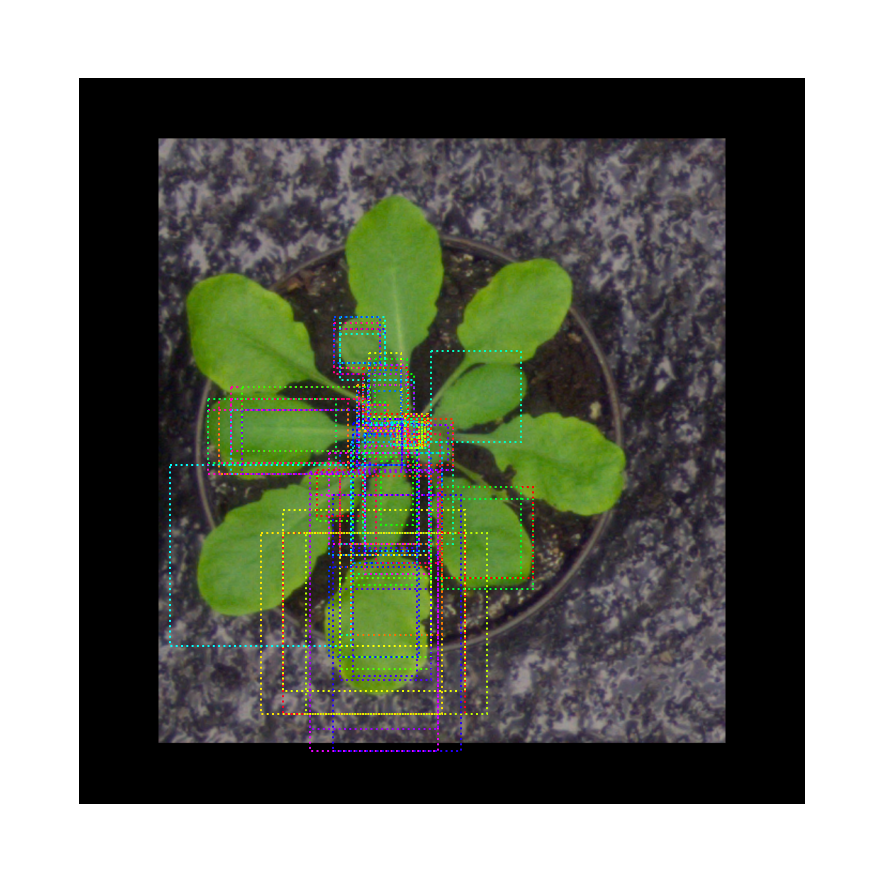

In [65]:
# Show top anchors by score (before refinement)
limit = 100
sorted_anchor_ids = np.argsort(rpn['rpn_class'][:,:,1].flatten())[::-1]
visualize.draw_boxes(image, boxes=model.anchors[sorted_anchor_ids[:limit]], ax=get_ax())

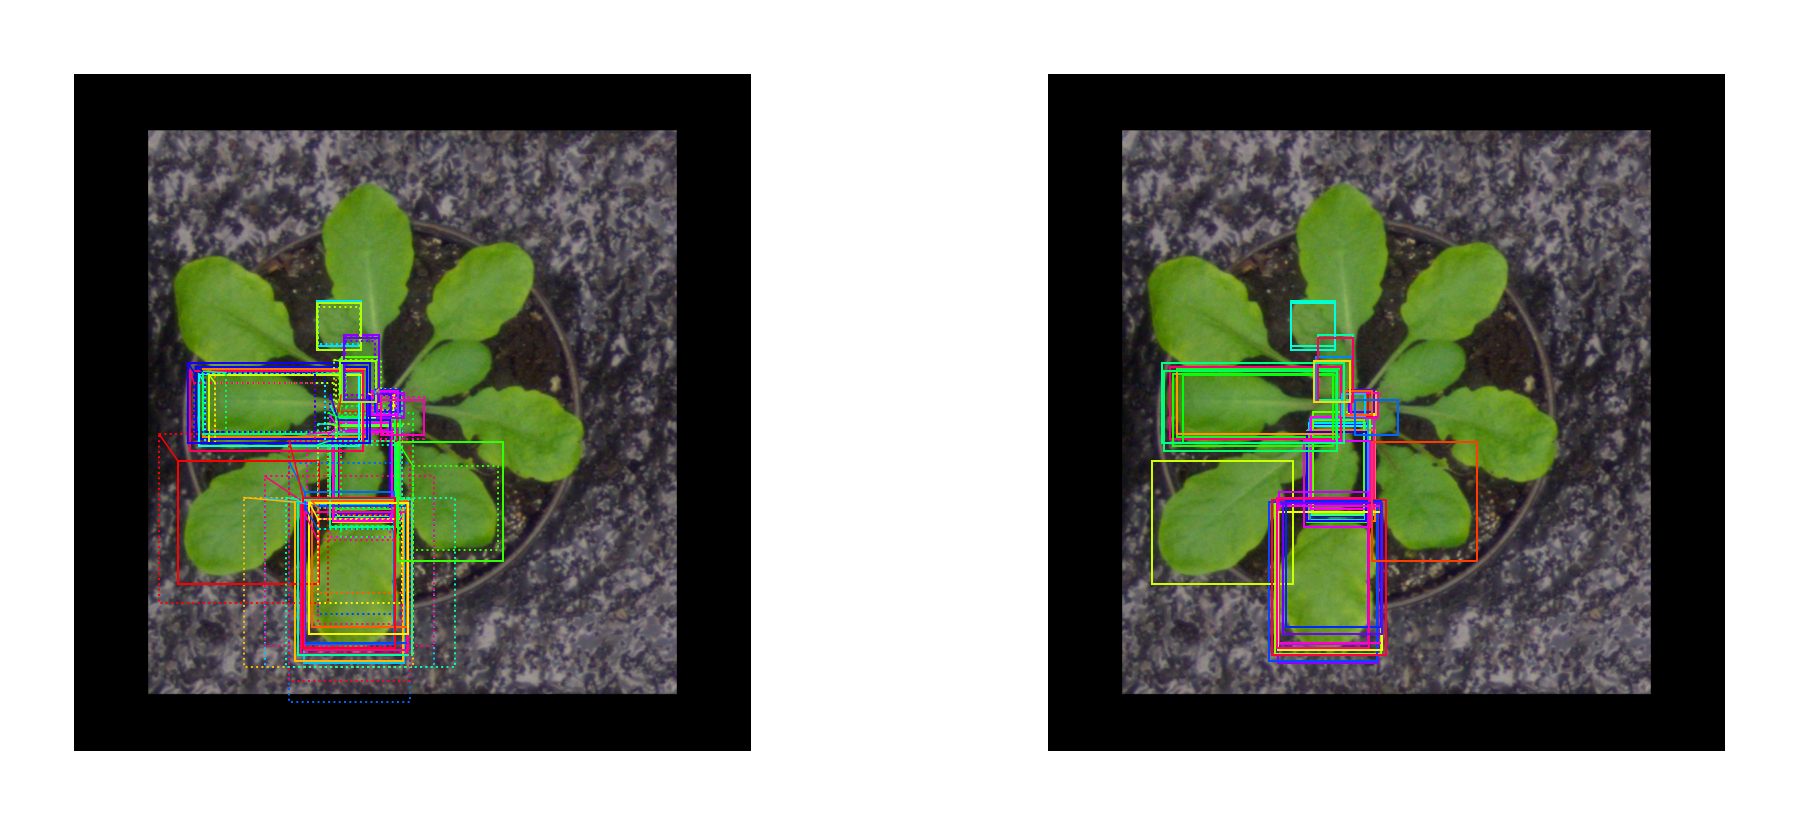

In [66]:
# Show top anchors with refinement. Then with clipping to image boundaries
limit = 50
ax = get_ax(1, 2)
pre_nms_anchors = utils.denorm_boxes(rpn["pre_nms_anchors"][0], image.shape[:2])
refined_anchors = utils.denorm_boxes(rpn["refined_anchors"][0], image.shape[:2])
refined_anchors_clipped = utils.denorm_boxes(rpn["refined_anchors_clipped"][0], image.shape[:2])
visualize.draw_boxes(image, boxes=pre_nms_anchors[:limit],
                     refined_boxes=refined_anchors[:limit], ax=ax[0])
visualize.draw_boxes(image, refined_boxes=refined_anchors_clipped[:limit], ax=ax[1])

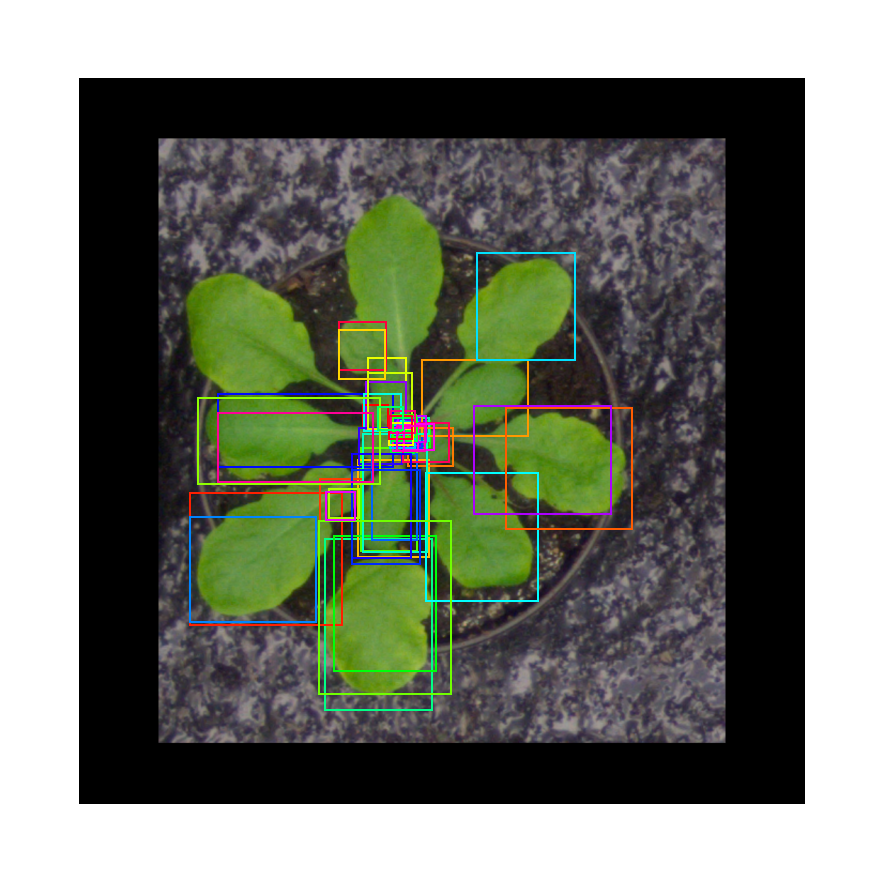

In [67]:
# Show refined anchors after non-max suppression
limit = 50
ixs = rpn["post_nms_anchor_ix"][:limit]
visualize.draw_boxes(image, refined_boxes=refined_anchors_clipped[ixs], ax=get_ax())

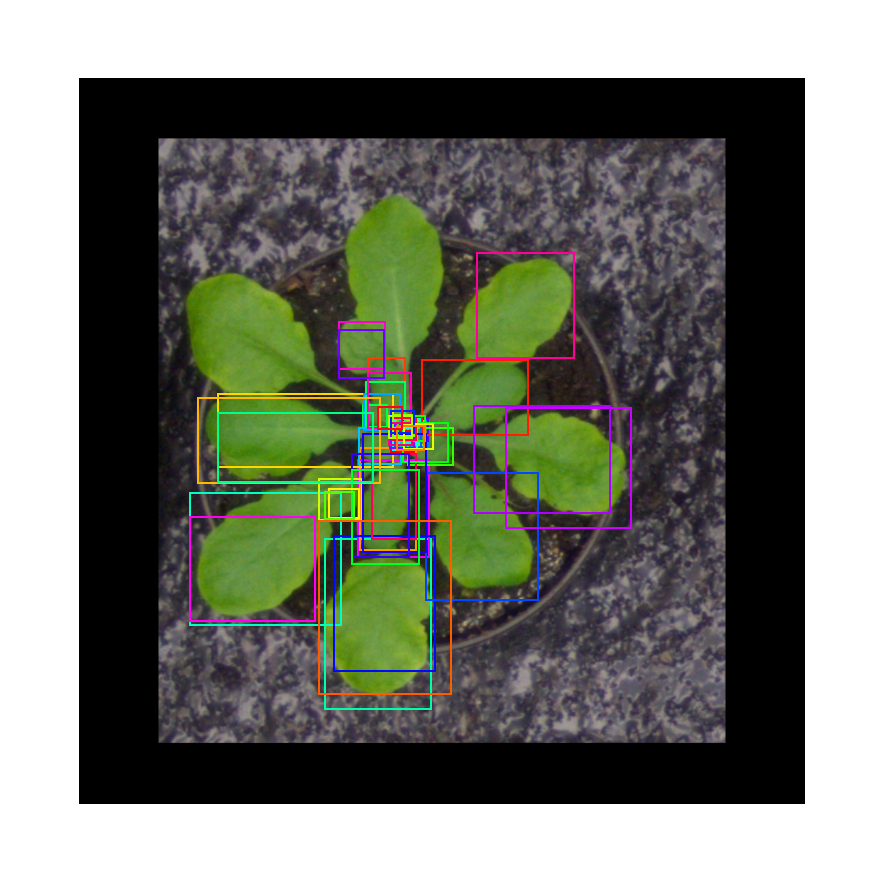

In [68]:
# Show final proposals
# These are the same as the previous step (refined anchors 
# after NMS) but with coordinates normalized to [0, 1] range.
limit = 50
# Convert back to image coordinates for display
h, w = config.IMAGE_SHAPE[:2]
proposals = rpn['proposals'][0, :limit] * np.array([h, w, h, w])
visualize.draw_boxes(image, refined_boxes=proposals, ax=get_ax())

## Stage 2: Proposal Classification

This stage takes the region proposals from the RPN and classifies them.

### 2.a Proposal Classification

Run the classifier heads on proposals to generate class propbabilities and bounding box regressions.

In [69]:
# Get input and output to classifier and mask heads.
mrcnn = model.run_graph([image], [
    ("proposals", model.keras_model.get_layer("ROI").output),
    ("probs", model.keras_model.get_layer("mrcnn_class").output),
    ("deltas", model.keras_model.get_layer("mrcnn_bbox").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
])

proposals                shape: (1, 1000, 4)          min:    0.11145  max:    0.91894  float32
probs                    shape: (1, 1000, 2)          min:    0.00001  max:    0.99999  float32
deltas                   shape: (1, 1000, 2, 4)       min:   -4.71388  max:    3.08620  float32
masks                    shape: (1, 100, 28, 28, 2)   min:    0.00000  max:    0.99992  float32
detections               shape: (1, 100, 6)           min:    0.00000  max:    1.00000  float32


17 detections: ['leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf'
 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf']


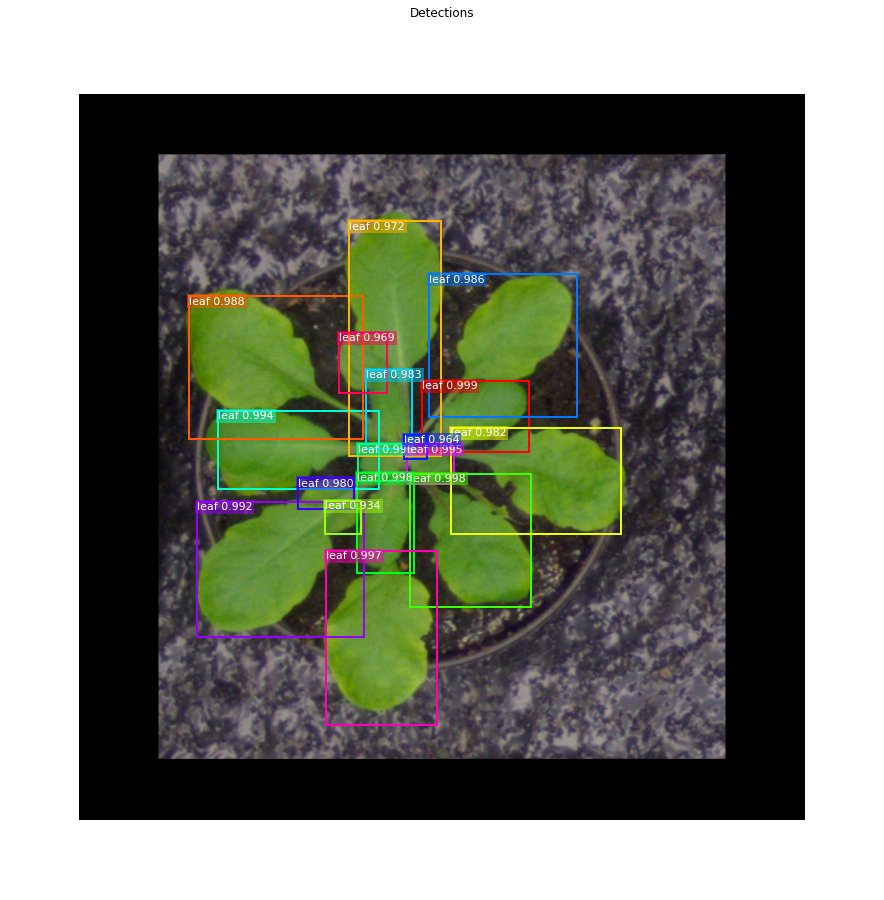

In [70]:
# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]
detections = mrcnn['detections'][0, :det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

captions = ["{} {:.3f}".format(dataset.class_names[int(c)], s) if c > 0 else ""
            for c, s in zip(detections[:, 4], detections[:, 5])]
visualize.draw_boxes(
    image, 
    refined_boxes=utils.denorm_boxes(detections[:, :4], image.shape[:2]),
    visibilities=[2] * len(detections),
    captions=captions, title="Detections",
    ax=get_ax())

### 2.c Step by Step Detection

Here we dive deeper into the process of processing the detections.

In [71]:
# Proposals are in normalized coordinates. Scale them
# to image coordinates.
h, w = config.IMAGE_SHAPE[:2]
proposals = np.around(mrcnn["proposals"][0] * np.array([h, w, h, w])).astype(np.int32)

# Class ID, score, and mask per proposal
roi_class_ids = np.argmax(mrcnn["probs"][0], axis=1)
roi_scores = mrcnn["probs"][0, np.arange(roi_class_ids.shape[0]), roi_class_ids]
roi_class_names = np.array(dataset.class_names)[roi_class_ids]
roi_positive_ixs = np.where(roi_class_ids > 0)[0]

# How many ROIs vs empty rows?
print("{} Valid proposals out of {}".format(np.sum(np.any(proposals, axis=1)), proposals.shape[0]))
print("{} Positive ROIs".format(len(roi_positive_ixs)))

# Class counts
print(list(zip(*np.unique(roi_class_names, return_counts=True))))

1000 Valid proposals out of 1000
198 Positive ROIs
[('BG', 802), ('leaf', 198)]


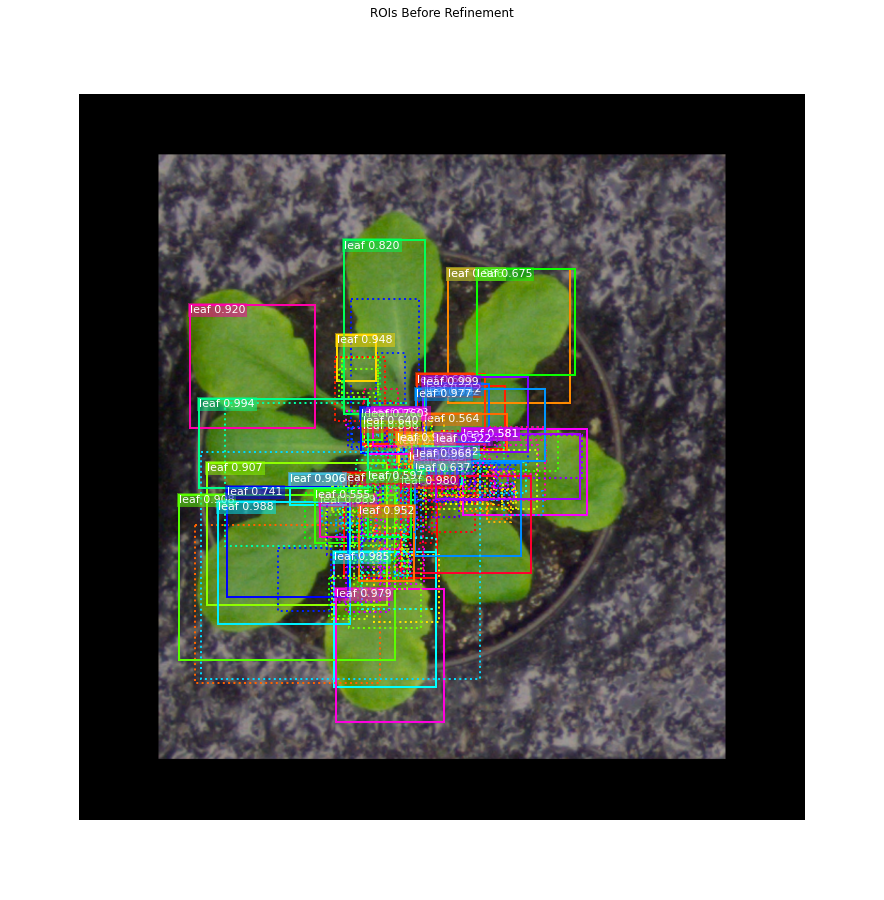

In [72]:
# Display a random sample of proposals.
# Proposals classified as background are dotted, and
# the rest show their class and confidence score.
limit = 200
ixs = np.random.randint(0, proposals.shape[0], limit)
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[ixs], roi_scores[ixs])]
visualize.draw_boxes(image, boxes=proposals[ixs],
                     visibilities=np.where(roi_class_ids[ixs] > 0, 2, 1),
                     captions=captions, title="ROIs Before Refinement",
                     ax=get_ax())

#### Apply Bounding Box Refinement

roi_bbox_specific        shape: (1000, 4)             min:   -2.65735  max:    3.08620  float32
refined_proposals        shape: (1000, 4)             min:   68.00000  max:  965.00000  int32


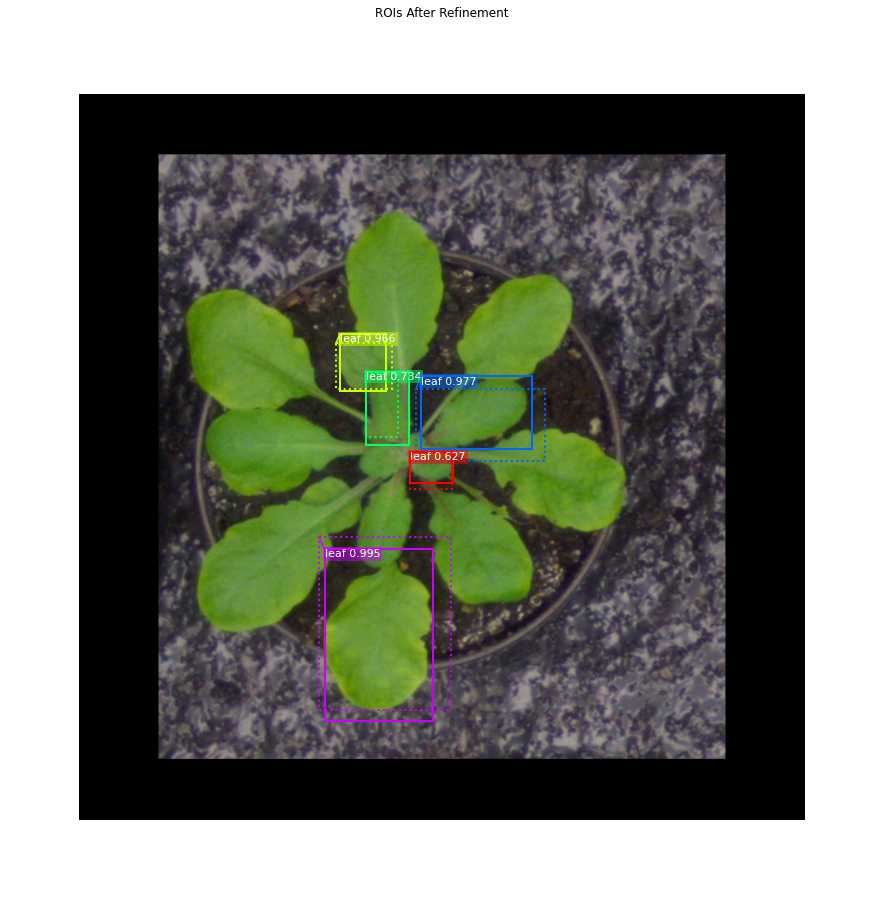

In [73]:
# Class-specific bounding box shifts.
roi_bbox_specific = mrcnn["deltas"][0, np.arange(proposals.shape[0]), roi_class_ids]
log("roi_bbox_specific", roi_bbox_specific)

# Apply bounding box transformations
# Shape: [N, (y1, x1, y2, x2)]
refined_proposals = utils.apply_box_deltas(
    proposals, roi_bbox_specific * config.BBOX_STD_DEV).astype(np.int32)
log("refined_proposals", refined_proposals)

# Show positive proposals
# ids = np.arange(roi_boxes.shape[0])  # Display all
limit = 5
ids = np.random.randint(0, len(roi_positive_ixs), limit)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[roi_positive_ixs][ids], roi_scores[roi_positive_ixs][ids])]
visualize.draw_boxes(image, boxes=proposals[roi_positive_ixs][ids],
                     refined_boxes=refined_proposals[roi_positive_ixs][ids],
                     visibilities=np.where(roi_class_ids[roi_positive_ixs][ids] > 0, 1, 0),
                     captions=captions, title="ROIs After Refinement",
                     ax=get_ax())

#### Filter Low Confidence Detections

In [74]:
# Remove boxes classified as background
keep = np.where(roi_class_ids > 0)[0]
print("Keep {} detections:\n{}".format(keep.shape[0], keep))

Keep 198 detections:
[  0   1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18
  19  20  21  22  24  26  28  29  30  31  33  34  35  37  38  40  41  43
  44  48  55  56  57  58  61  62  63  64  65  68  69  70  72  73  74  76
  77  79  80  81  82  85  86  87  88  94  98 104 105 108 110 111 112 113
 114 116 122 129 130 132 133 134 140 145 149 153 157 158 169 170 171 172
 174 176 181 183 186 187 189 195 196 199 206 218 220 222 230 231 233 235
 248 249 254 255 257 268 274 278 282 285 291 293 294 309 318 323 339 342
 353 364 365 377 388 397 405 411 424 429 434 435 455 484 490 492 503 514
 517 536 537 543 546 551 553 565 588 590 592 621 623 624 625 632 650 656
 659 663 673 679 685 712 719 723 732 745 748 751 762 780 784 785 806 839
 843 845 847 875 885 888 889 919 921 925 943 951 964 981 984 988 992 996]


In [75]:
# Remove low confidence detections
keep = np.intersect1d(keep, np.where(roi_scores >= config.DETECTION_MIN_CONFIDENCE)[0])
print("Remove boxes below {} confidence. Keep {}:\n{}".format(
    config.DETECTION_MIN_CONFIDENCE, keep.shape[0], keep))

Remove boxes below 0.9 confidence. Keep 92:
[  0   1   2   3   4   6   7   8   9  10  13  14  19  20  21  22  24  26
  28  29  30  31  33  35  43  48  55  58  61  63  64  70  76  77  80  82
  85  87  98 105 108 110 112 129 133 134 140 145 157 158 169 176 195 196
 222 249 255 274 282 293 294 318 323 365 424 435 455 517 546 551 553 565
 590 632 650 656 663 673 679 748 762 784 806 839 845 875 885 919 921 943
 951 984]


#### Per-Class Non-Max Suppression

In [76]:
# Apply per-class non-max suppression
pre_nms_boxes = refined_proposals[keep]
pre_nms_scores = roi_scores[keep]
pre_nms_class_ids = roi_class_ids[keep]

nms_keep = []
for class_id in np.unique(pre_nms_class_ids):
    # Pick detections of this class
    ixs = np.where(pre_nms_class_ids == class_id)[0]
    # Apply NMS
    class_keep = utils.non_max_suppression(pre_nms_boxes[ixs], 
                                            pre_nms_scores[ixs],
                                            config.DETECTION_NMS_THRESHOLD)
    # Map indicies
    class_keep = keep[ixs[class_keep]]
    nms_keep = np.union1d(nms_keep, class_keep)
    print("{:22}: {} -> {}".format(dataset.class_names[class_id][:20], 
                                   keep[ixs], class_keep))

keep = np.intersect1d(keep, nms_keep).astype(np.int32)
print("\nKept after per-class NMS: {}\n{}".format(keep.shape[0], keep))

leaf                  : [  0   1   2   3   4   6   7   8   9  10  13  14  19  20  21  22  24  26
  28  29  30  31  33  35  43  48  55  58  61  63  64  70  76  77  80  82
  85  87  98 105 108 110 112 129 133 134 140 145 157 158 169 176 195 196
 222 249 255 274 282 293 294 318 323 365 424 435 455 517 546 551 553 565
 590 632 650 656 663 673 679 748 762 784 806 839 845 875 885 919 921 943
 951 984] -> [ 24  76   1   0  19  13 293  80 134  64   9  48 169 806 748   7 919]

Kept after per-class NMS: 17
[  0   1   7   9  13  19  24  48  64  76  80 134 169 293 748 806 919]


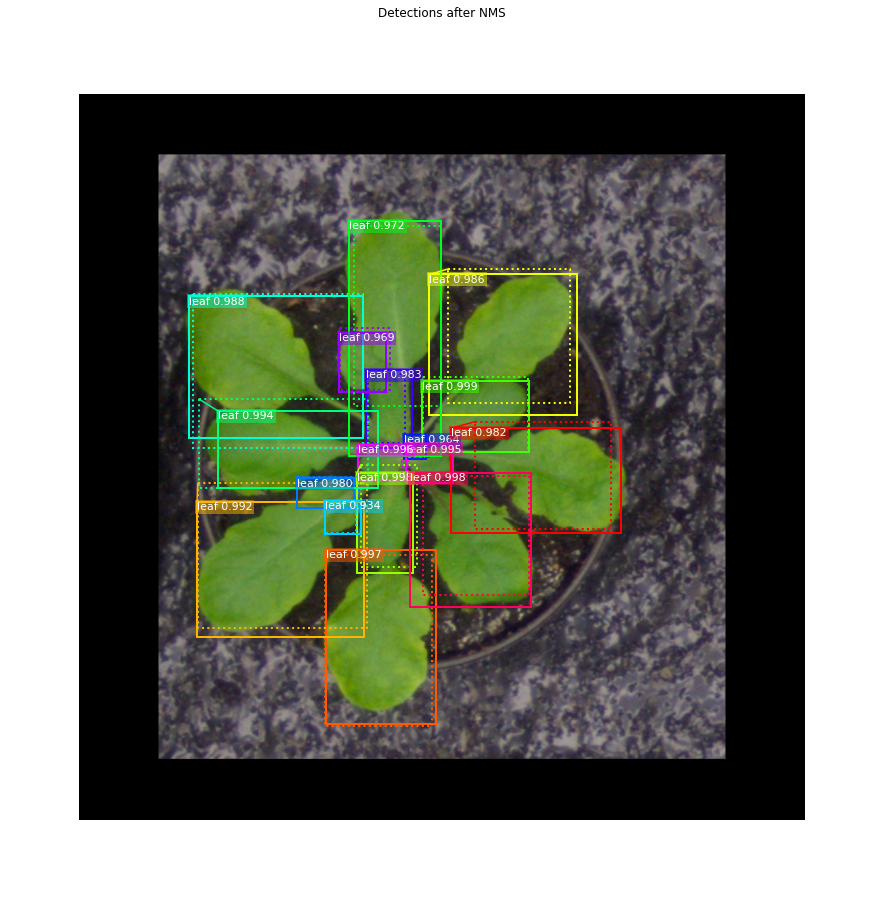

In [77]:
# Show final detections
ixs = np.arange(len(keep))  # Display all
# ixs = np.random.randint(0, len(keep), 10)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[keep][ixs], roi_scores[keep][ixs])]
visualize.draw_boxes(
    image, boxes=proposals[keep][ixs],
    refined_boxes=refined_proposals[keep][ixs],
    visibilities=np.where(roi_class_ids[keep][ixs] > 0, 1, 0),
    captions=captions, title="Detections after NMS",
    ax=get_ax())

## Stage 3: Generating Masks

This stage takes the detections (refined bounding boxes and class IDs) from the previous layer and runs the mask head to generate segmentation masks for every instance.

### 3.a Mask Targets

These are the training targets for the mask branch

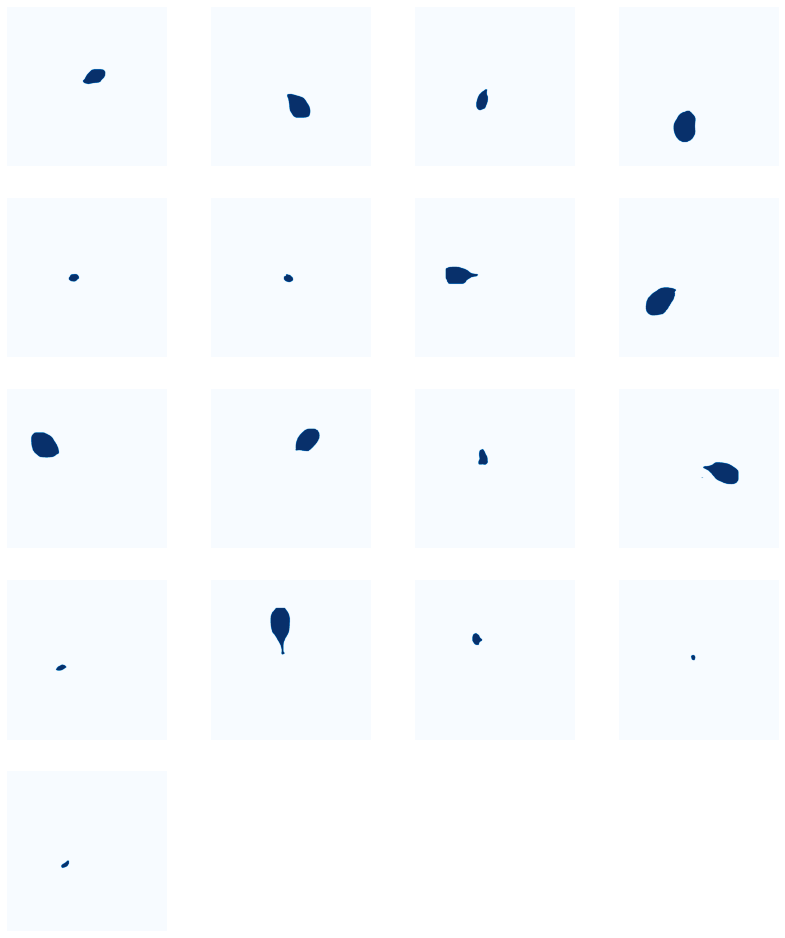

In [78]:
display_images(np.transpose(gt_mask, [2, 0, 1]), cmap="Blues")

### 3.b Predicted Masks

leaf counting....

In [79]:
# Get predictions of mask head
mrcnn = model.run_graph([image], [
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
])

# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]


detections               shape: (1, 100, 6)           min:    0.00000  max:    1.00000  float32
masks                    shape: (1, 100, 28, 28, 2)   min:    0.00000  max:    0.99992  float32
17 detections: ['leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf'
 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf' 'leaf']


In [ ]:
## 요걸로 leaf counting 가능
print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

뒤숭숭한 면적 계산...

In [80]:
# Masks
det_boxes = utils.denorm_boxes(mrcnn["detections"][0, :, :4], image.shape[:2])
det_mask_specific = np.array([mrcnn["masks"][0, i, :, :, c] 
                              for i, c in enumerate(det_class_ids)])
det_masks = np.array([utils.unmold_mask(m, det_boxes[i], image.shape)
                      for i, m in enumerate(det_mask_specific)])
log("det_mask_specific", det_mask_specific)
log("det_masks", det_masks)

det_mask_specific        shape: (17, 28, 28)          min:    0.00000  max:    0.99992  float32
det_masks                shape: (17, 1024, 1024)      min:    0.00000  max:    1.00000  bool


In [105]:
image.shape

(1024, 1024, 3)

In [104]:
print(det_masks.shape)

for mask in det_masks:
  positive_pixel_count = mask.sum() # assumes binary mask (True == 1)
  h, w = mask.shape[:] # assumes NHWC data format, adapt as needed
  area = positive_pixel_count / (w*h)
  print(area)

(17, 1024, 1024)
0.00934600830078125
0.01580810546875
0.006809234619140625
0.021299362182617188
0.0023441314697265625
0.0021238327026367188
0.015097618103027344
0.023270606994628906
0.021216392517089844
0.015623092651367188
0.004361152648925781
0.01969623565673828
0.001617431640625
0.02186870574951172
0.0030956268310546875
0.0007047653198242188
0.0013093948364257812


In [103]:
print(gt_mask.T.shape)

for mask in gt_mask.T:
  positive_pixel_count = mask.sum() # assumes binary mask (True == 1)
  h, w = mask.shape[:] # assumes NHWC data format, adapt as needed
  area = positive_pixel_count / (w*h)
  print(area)

(17, 1024, 1024)
0.00934600830078125
0.01580810546875
0.006809234619140625
0.021299362182617188
0.0023441314697265625
0.0021238327026367188
0.015097618103027344
0.023270606994628906
0.021216392517089844
0.015623092651367188
0.004361152648925781
0.01969623565673828
0.001617431640625
0.02186870574951172
0.0030956268310546875
0.0007047653198242188
0.0013093948364257812


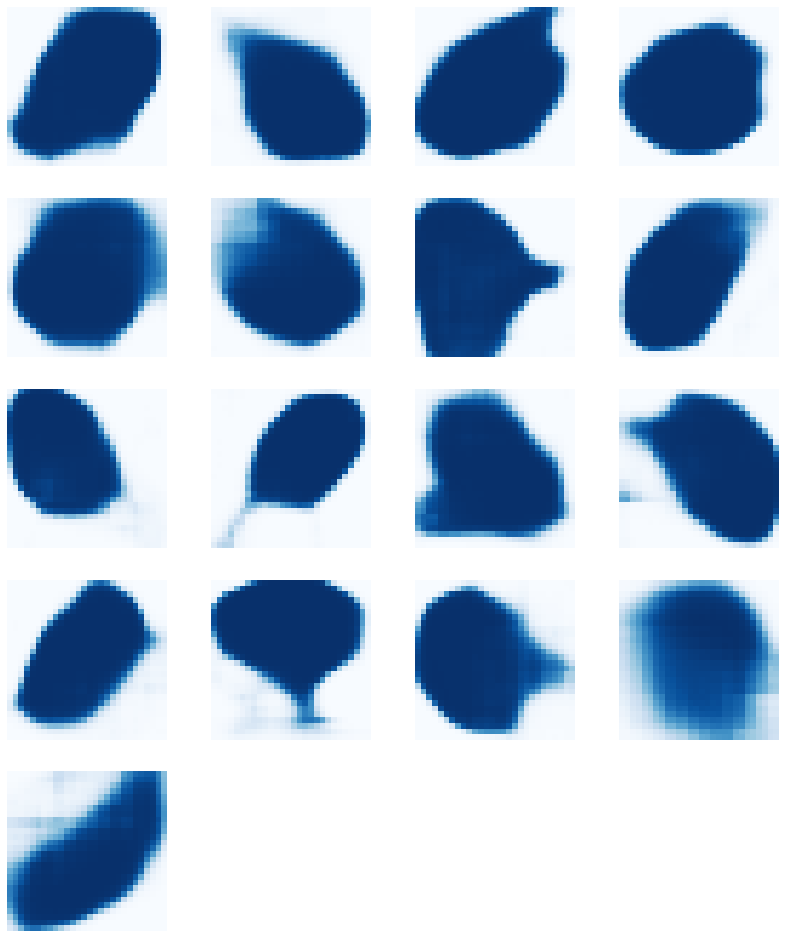

In [81]:
display_images(det_mask_specific[:] * 255, cmap="Blues", interpolation="none")

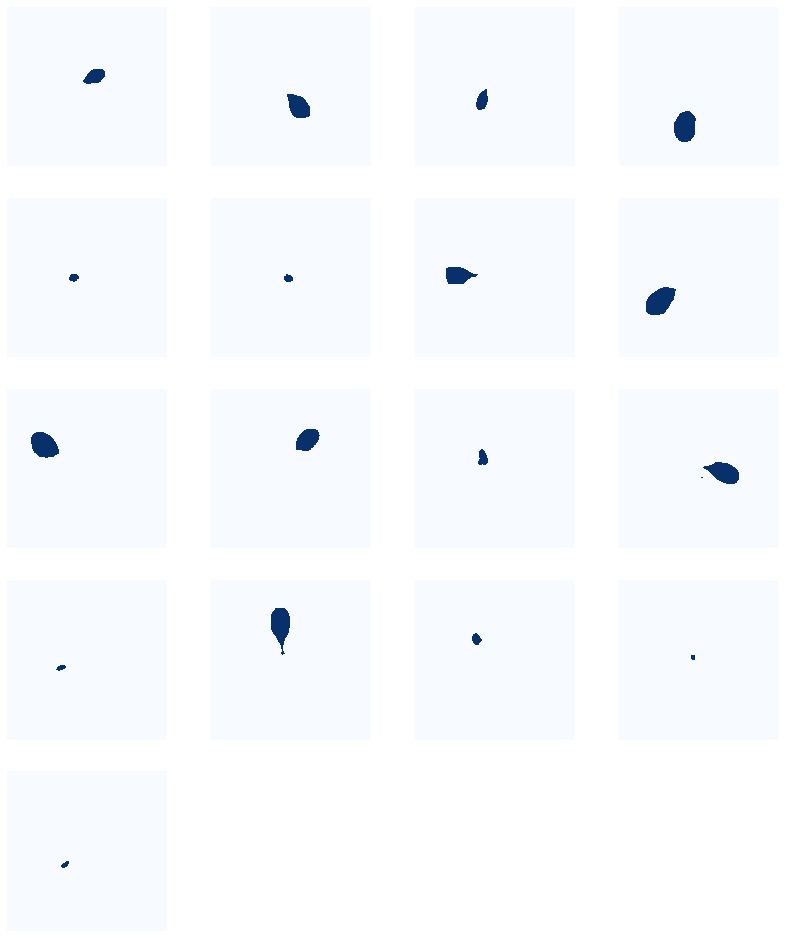

In [85]:
display_images(det_masks[:] * 255, cmap="Blues", interpolation="none")

## Visualize Activations

In some cases it helps to look at the output from different layers and visualize them to catch issues and odd patterns.

In [84]:
# Get activations of a few sample layers
activations = model.run_graph([image], [
    ("input_image",        tf.identity(model.keras_model.get_layer("input_image").output)),
    ("res2c_out",          model.keras_model.get_layer("res2c_out").output),
    ("res3c_out",          model.keras_model.get_layer("res3c_out").output),
    ("res4w_out",          model.keras_model.get_layer("res4w_out").output),  # for resnet100
    ("rpn_bbox",           model.keras_model.get_layer("rpn_bbox").output),
    ("roi",                model.keras_model.get_layer("ROI").output),
])

input_image              shape: (1, 1024, 1024, 3)    min: -123.70000  max:   68.20000  float32
res2c_out                shape: (1, 256, 256, 256)    min:    0.00000  max:   20.48809  float32
res3c_out                shape: (1, 128, 128, 512)    min:    0.00000  max:   28.80074  float32
res4w_out                shape: (1, 64, 64, 1024)     min:    0.00000  max:   57.09822  float32
rpn_bbox                 shape: (1, 261888, 4)        min:  -11.06779  max:   20.86283  float32
roi                      shape: (1, 1000, 4)          min:    0.11145  max:    0.91894  float32


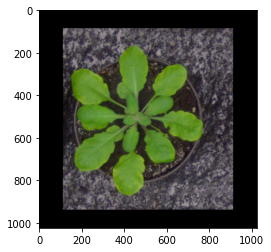

In [86]:
# Input image (normalized)
_ = plt.imshow(modellib.unmold_image(activations["input_image"][0],config))

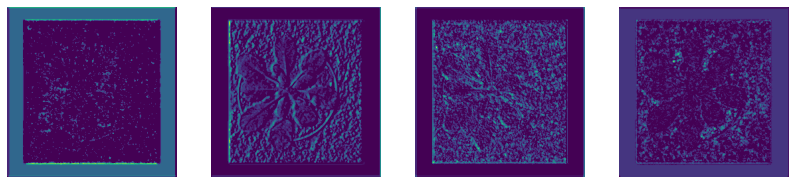

In [87]:
# Backbone feature map
display_images(np.transpose(activations["res2c_out"][0,:,:,:4], [2, 0, 1]), cols=4)